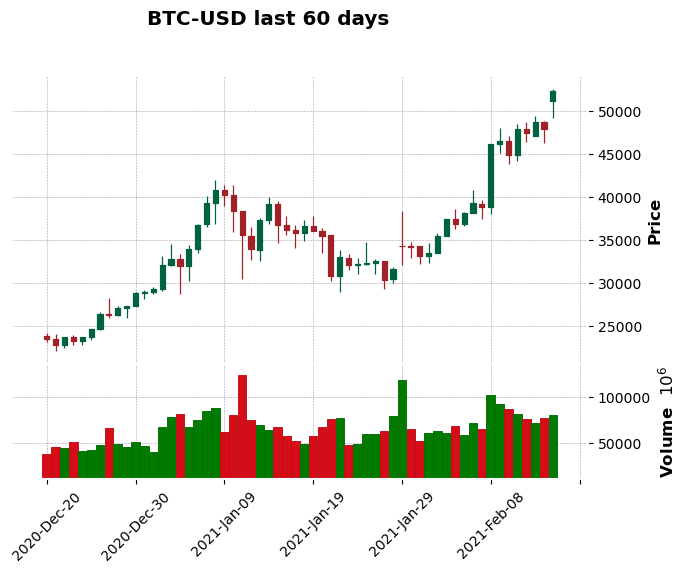

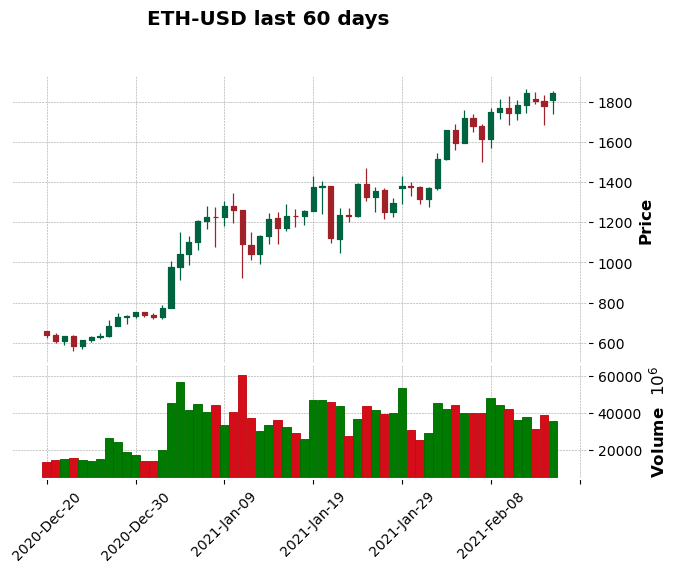

In [30]:
import pandas_datareader as web
import datetime as dt
import mplfinance as mpf

#define time span
timespan = 60
# start = dt.datetime(2020, 12, 1)  ##exact date in the past
start = dt.datetime.now() - dt.timedelta(timespan)
end = dt.datetime.now()

#define pairs
BTCUSD = 'BTC-USD'
ALTUSD = 'ETH-USD'

# Plot
data = web.DataReader(BTCUSD, "yahoo", start, end)
alt = web.DataReader(ALTUSD, "yahoo", start, end)

BTCtitle = f'{BTCUSD} last {str(timespan)} days'
ALTtitle = f'{ALTUSD} last {str(timespan)} days'

mpf.plot(data, type="candle", volume=True, style = 'charles',title = BTCtitle)
mpf.plot(alt, type="candle", volume=True,style = 'charles', title = ALTtitle)


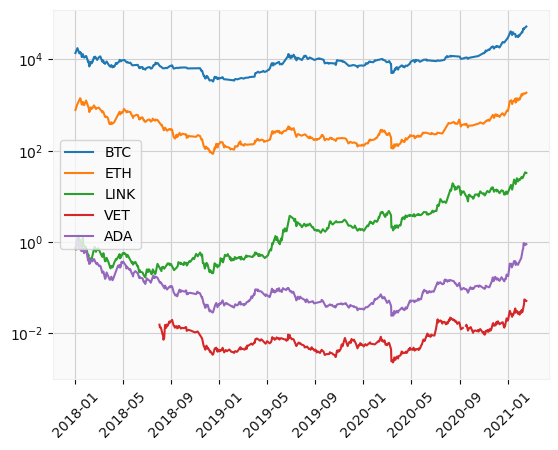

                     BTC          ETH       LINK       VET       ADA
Date                                                                
2018-01-01  13657.200195   772.640991   0.733563       NaN  0.728657
2018-01-02  14982.099609   884.443970   0.673712       NaN  0.782587
2018-01-03  15201.000000   962.719971   0.681167       NaN  1.079660
2018-01-04  15599.200195   980.921997   0.984368       NaN  1.114120
2018-01-05  17429.500000   997.719971   0.907486       NaN  0.999559
...                  ...          ...        ...       ...       ...
2021-02-11  47909.332031  1783.797974  27.874239  0.042718  0.927741
2021-02-12  47504.851562  1843.532593  30.640739  0.054699  0.925587
2021-02-14  48717.289062  1805.084106  33.290321  0.052669  0.848419
2021-02-15  47945.058594  1779.791016  32.575897  0.050898  0.861012
2021-02-17  52212.003906  1845.573364  32.302402  0.050770  0.893364

[1212 rows x 5 columns]


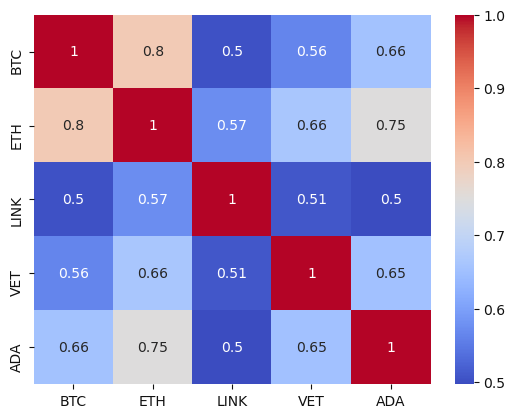

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

currency = "USD"
metric = "Close"

start = dt.datetime(2018,1,1) 
end = dt.datetime.now()

crypto = ['BTC', 'ETH', 'LINK', 'VET', 'ADA']
colnames = []

first = True

for ticker in crypto:
    data = web.DataReader(f"{ticker}-{currency}", "yahoo", start, end)
    if first:
        combined = data[[metric]].copy()
        colnames.append(ticker)
        combined.columns = colnames
        first = False
    else:
        combined = combined.join(data[metric])
        colnames.append(ticker)
        combined.columns = colnames

plt.yscale('log') # first show linear

for ticker in crypto:
    plt.plot(combined[ticker], label=ticker)

plt.legend(loc="best")
plt.xticks(rotation=45)

plt.show()

# # Correlation Heat Map

print(combined)

combined = combined.pct_change().corr(method='pearson')

sns.heatmap(combined, annot=True, cmap="coolwarm")
plt.show()